In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("/home/hemanth/Documents/XGBoosting/Iris.csv")

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

/home/hemanth/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


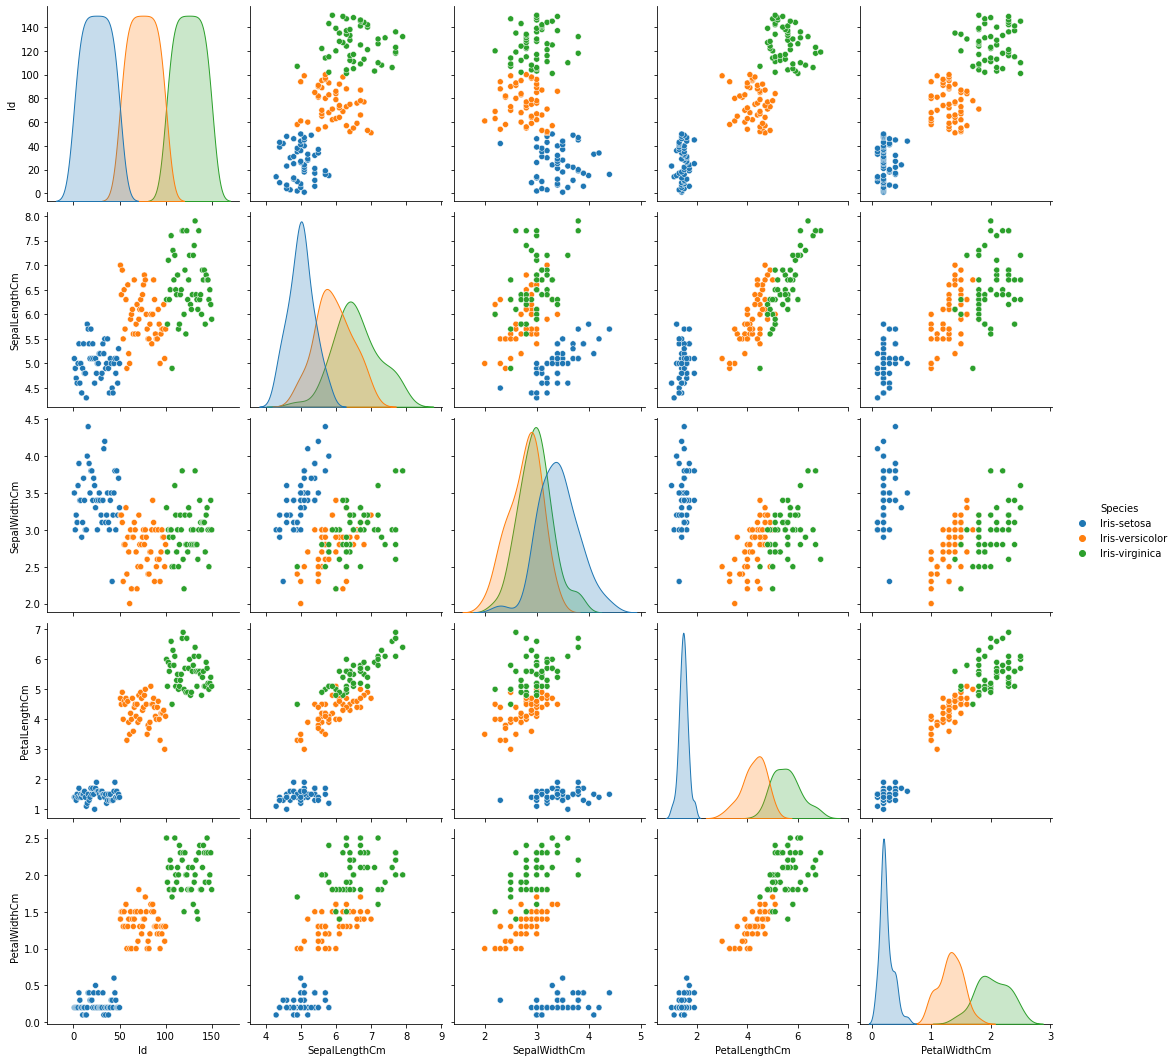

In [10]:
sns.pairplot(data, hue='Species', size=3)

### Building the Pipeline

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data['Species'] = LabelEncoder().fit_transform(data['Species'])
data.iloc[[0,1,-2,-1],:]


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [12]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', LogisticRegression()) #step2 - classifier
])
pipeline.steps

[('normalizer', StandardScaler()), ('clf', LogisticRegression())]

In [13]:
#Seperate train and test data
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1].values,
                                                   data['Species'],
                                                   test_size = 0.4,
                                                   random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(90, 5)
(60, 5)
(90,)
(60,)


# Trying Logistic Regression Classifier

#### Use Cross-validation to test the accuracy of the pipeline

In [14]:
from sklearn.model_selection import cross_validate

scores = cross_validate(pipeline, X_train, y_train)
scores

{'fit_time': array([0.00960493, 0.00764322, 0.00770187, 0.0077467 , 0.01005816]),
 'score_time': array([0.00063825, 0.00054097, 0.0005579 , 0.0007875 , 0.00057554]),
 'test_score': array([1., 1., 1., 1., 1.])}

In [15]:
scores['test_score'].mean()


1.0

### Spot Check Algorithms in the pipeline

In [16]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

---------------------------------
LogisticRegression()
-----------------------------------
fit_time  mean  0.008646345138549805
fit_time  std  0.002000879232156747
score_time  mean  0.00071258544921875
score_time  std  0.00032078545665000863
test_score  mean  1.0
test_score  std  0.0
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.001207590103149414
fit_time  std  0.0001097275761744194
score_time  mean  0.0004154682159423828
score_time  std  1.7088209866007767e-05
test_score  mean  0.9888888888888889
test_score  std  0.022222222222222233
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.0011680126190185547
fit_time  std  0.00015254057210131446
score_time  mean  0.00042748451232910156
score_time  std  5.2362278433045274e-05
test_score  mean  0.9888888888888889
test_score  std  0.022222222222222233
---------------------------------
KNeighborsClassifier(n_neighbors=3)
--------------------------------

### Cross-Validation and Hyper Parameters Tuning

In [17]:
from sklearn.model_selection import GridSearchCV
pipeline.set_params(clf= SVC())
pipeline.steps



[('normalizer', StandardScaler()), ('clf', SVC())]

In [18]:
cv_grid = GridSearchCV(pipeline, param_grid = {
    'clf__kernel' : ['linear', 'rbf'],
    'clf__C' : np.linspace(0.1,1.2,12)
})

cv_grid.fit(X_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('normalizer', StandardScaler()),
                                       ('clf', SVC())]),
             param_grid={'clf__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2]),
                         'clf__kernel': ['linear', 'rbf']})

In [19]:
cv_grid.best_params_

{'clf__C': 0.1, 'clf__kernel': 'linear'}

In [20]:
cv_grid.best_estimator_

Pipeline(steps=[('normalizer', StandardScaler()),
                ('clf', SVC(C=0.1, kernel='linear'))])

In [21]:
cv_grid.best_score_


1.0

In [22]:
y_predict = cv_grid.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy*100))

Accuracy of the best classifier after CV is 100.000%


## DAta Distribution

In [23]:
data_name=data.columns


In [35]:
from scipy.stats import skew
from scipy.stats import kurtosis
def plotBarCat(data,feature,target):
    
    
    
    x0 = data[data[target]==0][feature]
    x1 = data[data[target]==1][feature]
    x2 = data[data[target]==2][feature]


    trace1 = go.Histogram(
        x=x0,
        opacity=0.75
    )
    trace2 = go.Histogram(
        x=x1,
        opacity=0.75
    )
    trace3 = go.Histogram(
        x=x2,
        opacity=0.75
    )
    data = [trace1, trace2, trace3]
    layout = go.Layout(barmode='overlay',
                      title=feature,
                       yaxis=dict(title='Count'
        ))
    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='overlaid histogram')
    
    def DescribeFloatSkewKurt(df,target):
        """
            A fundamental task in many statistical analyses is to characterize
            the location and variability of a data set. A further
            characterization of the data includes skewness and kurtosis.
            Skewness is a measure of symmetry, or more precisely, the lack
            of symmetry. A distribution, or data set, is symmetric if it
            looks the same to the left and right of the center point.
            Kurtosis is a measure of whether the data are heavy-tailed
            or light-tailed relative to a normal distribution. That is,
            data sets with high kurtosis tend to have heavy tails, or
            outliers. Data sets with low kurtosis tend to have light
            tails, or lack of outliers. A uniform distribution would
            be the extreme case
        """
        print('-*-'*25)
        print("{0} mean : ".format(target), np.mean(data[target]))
        print("{0} var  : ".format(target), np.var(data[target]))
        print("{0} skew : ".format(target), skew(data[target]))
        print("{0} kurt : ".format(target), kurtosis(data[target]))
        print('-*-'*25)
    
    DescribeFloatSkewKurt(data,target)

In [36]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)
plotBarCat(data,data_name[0],'Species')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


TypeError: list indices must be integers or slices, not str